MULTILINEAR REGRESSION FRAMEWORK FOR TRAIN/TEST

In [2]:
#Transformation 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [62]:
training = pd.read_csv('../../data/train_clean.csv', index_col=0)
testing = pd.read_csv('../../data/test_clean.csv', index_col=0)

In [63]:
testing.columns

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageType', 'GarageArea', 'Kitchen',
       'Fireplace', 'ExterQ', 'BsmtQ', 'HeatingQ', 'n_toilets', 'n_showers'],
      dtype='object')

In [64]:
#Convert year building was built/remodeled into a numeric Age (training data set)
training['AgeBuilt'] = 2019 - training['YearBuilt']
training['AgeRemodel'] = 2019 - training['YearRemodAdd']

In [65]:
#Convert year building was built/remodeled into a numeric Age (testing data set)
testing['AgeBuilt'] = 2019 - testing['YearBuilt']
testing['AgeRemodel'] = 2019 - testing['YearRemodAdd']

In [66]:
#Normalization of 5 features: training
training['NormLot'] = (training.LotArea - training.LotArea.mean())/training.LotArea.std()
training['NormAgeBuilt'] = (training.AgeBuilt - training.AgeBuilt.mean())/training.AgeBuilt.std()
training['NormAgeRemodel'] = (training.AgeRemodel - training.AgeRemodel.mean())/training.AgeRemodel.std()
training['NormGrLivArea'] = (training.GrLivArea - training.GrLivArea.mean())/training.GrLivArea.std()
training['NormGarageArea'] = (training.GarageArea - training.GarageArea.mean())/training.GarageArea.std()
training['NormSalePrice'] = (training.SalePrice - training.SalePrice.mean())/training.SalePrice.std()

In [67]:
#Normalization of 5 features: testing
testing['NormLot'] = (testing.LotArea - testing.LotArea.mean())/testing.LotArea.std()
testing['NormAgeBuilt'] = (testing.AgeBuilt - testing.AgeBuilt.mean())/testing.AgeBuilt.std()
testing['NormAgeRemodel'] = (testing.AgeRemodel - testing.AgeRemodel.mean())/testing.AgeRemodel.std()
testing['NormGrLivArea'] = (testing.GrLivArea - testing.GrLivArea.mean())/testing.GrLivArea.std()
testing['NormGarageArea'] = (testing.GarageArea - testing.GarageArea.mean())/testing.GarageArea.std()
#testing['NormSalePrice'] = (testing.SalePrice - testing.SalePrice.mean())/testing.SalePrice.std()

In [68]:
#Training data // train_y could be SalePrice or NormSalePrice
x_list = ['NormLot','NormAgeBuilt','NormAgeRemodel','NormGrLivArea','BsmtFullBath','BedroomAbvGr','KitchenAbvGr',
         'GarageType','NormGarageArea','Kitchen','Fireplace','ExterQ','BsmtQ','HeatingQ','n_toilets','n_showers']
train_x = training[x_list]
train_y = training['SalePrice']
test_x = testing[x_list]

In [69]:
#Multilinear - Simple
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(train_x, train_y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(train_x, train_y)))

Intercept: 21056.703093
Coefficients: [  9125.27242419  -2867.10279689  -1253.04475823  35325.91819729
 -16928.22844855   -573.94957162 -12898.67640819  -5422.7375221
   9673.77507128  13928.67454885   3408.27902767  26631.13672299
   8218.95003407   1713.20398085  -1694.35568704   4764.96821738]
R^2: 0.833345


In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

LASSO REGRESSION / COEFFICIENT ESTIMATES AT DIFFERENT ALPHA LEVELS

In [82]:
lasso  = Lasso()
alphas = np.linspace(0.1,20.1,20)
lasso.set_params(normalize=False)
coefs_lasso  = []
intercepts_lasso = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(train_x, train_y)  
    coefs_lasso.append(lasso.coef_)
    intercepts_lasso.append(lasso.intercept_)
        
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = train_x.columns)  
coefs_lasso.head(10)

,NormLot,NormAgeBuilt,NormAgeRemodel,NormGrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,GarageType,NormGarageArea,Kitchen,Fireplace,ExterQ,BsmtQ,HeatingQ,n_toilets,n_showers
0.100000,9125.186695,-2867.216800,-1253.166696,35325.625773,-16926.616686,-573.530780,-12895.830747,-5420.797670,9673.847938,13928.736871,3408.391330,26631.124379,8219.050374,1713.280168,-1693.555136,4763.089452
1.152632,9124.504595,-2868.011916,-1254.274924,35321.446335,-16909.829478,-569.372904,-12865.369467,-5399.584399,9674.646416,13929.168607,3409.571677,26631.188036,8220.248193,1714.280949,-1683.508416,4743.029618
2.205263,9123.811113,-2868.767572,-1255.355396,35317.192105,-16892.851901,-565.176559,-12834.747235,-5378.339934,9675.467299,13929.608603,3410.760085,26631.326359,8221.496271,1715.312537,-1673.338192,4722.776615
3.257895,9123.125237,-2869.513234,-1256.432244,35312.908544,-16875.892445,-560.990543,-12804.119848,-5357.072831,9676.287682,13930.041072,3411.947906,26631.465779,8222.745439,1716.348280,-1663.125719,4702.527544
4.310526,9122.447642,-2870.244639,-1257.503085,35308.585688,-16858.942580,-556.814343,-12773.476377,-5335.777046,9677.108865,13930.465161,3413.135533,26631.611131,8223.999019,1717.390844,-1652.855665,4682.271126
5.363158,9121.778377,-2870.956875,-1258.564940,35304.212773,-16841.987900,-552.645981,-12742.801774,-5314.446633,9677.932769,13930.880550,3414.323601,26631.769219,8225.261637,1718.443553,-1642.511125,4661.990723
6.415789,9121.062057,-2871.714491,-1259.639189,35299.985437,-16824.871762,-548.406755,-12712.108080,-5293.236605,9678.766317,13931.341595,3415.517477,26631.943585,8226.533187,1719.481752,-1632.371519,4641.629384
7.468421,9120.400130,-2872.402810,-1260.688838,35295.553098,-16807.891754,-544.242322,-12681.384267,-5271.867285,9679.595414,13931.748936,3416.706861,26632.122757,8227.810473,1720.548180,-1621.937252,4621.303664
8.521053,9119.683736,-2873.161008,-1261.763418,35291.327106,-16790.776899,-540.003201,-12650.692130,-5250.658058,9680.428773,13932.210081,3417.900678,26632.296432,8229.081549,1721.586008,-1611.799724,4600.943960
9.573684,9119.027019,-2873.820231,-1262.797013,35286.826163,-16773.742580,-535.836436,-12619.895844,-5229.246632,9681.266374,13932.611049,3419.092597,26632.507570,8230.380800,1722.670413,-1601.260200,4580.544392


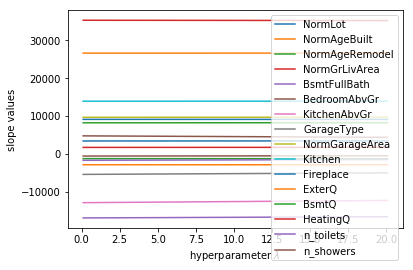

In [91]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   

In [48]:
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(train_x, train_y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients
print("The coef of determination of ridge regression is: %.4f" %ridge.score(train_x, train_y))

The coef of determination of ridge regression is: 0.8333


In [74]:
ridge_scores_train = []
lasso_scores_train = []
#ridge_scores_test  = []
#lasso_scores_test  = []

alphas = np.linspace(0.01, 1, 100)

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    lasso.set_params(alpha=alpha)
    ridge.fit(train_x, train_y)
    lasso.fit(train_x, train_y)
    ridge_scores_train.append(ridge.score(train_x, train_y))
    #ridge_scores_test.append(ridge.score(X_test, Y_test))
    lasso_scores_train.append(lasso.score(train_x, train_y))
    #lasso_scores_test.append(lasso.score(X_test, Y_test))
    
ridge_scores_train = np.array(ridge_scores_train) 
#ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
#lasso_scores_test  = np.array(lasso_scores_test)

Text(0,0.5,'$R^2$')

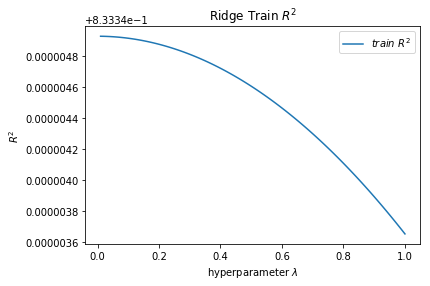

In [75]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
#plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train $R^2$')
#ridge_underfit = ridge_scores_train < ridge_scores_test
#last_underfit  = np.max(alphas[ridge_underfit])
#plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

Text(0,0.5,'$R^2$')

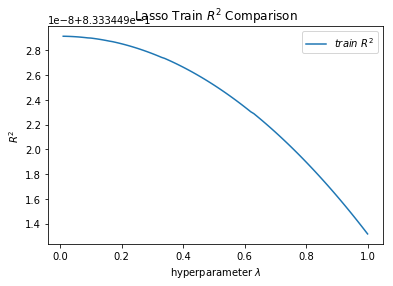

In [77]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
#plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train $R^2$ Comparison')
#lasso_underfit = lasso_scores_train < lasso_scores_test
#last_underfit  = np.max(alphas[lasso_underfit])
#plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')